ML TASK-1 IN FUTURE INTERNS Sales Forecasting starter Notebook

In [ ]:
# firtst we Install Require Libraries
!pip install pandas numpy matplotlib seaborn scikit-learn statsmodels prophet openpyxl



In [32]:
# Step 2 Import The 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from prophet import Prophet


In [33]:
#Step 3 WE have to load the our data set
df = pd.read_csv("D:\\Data Sets\\storesale\\train.csv")
df


C:\Users\varik\AppData\Local\Temp\ipykernel_15624\31676419.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:\\Data Sets\\storesale\\train.csv")


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [34]:
df.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [36]:
#Step 4 : Data Cleaning
df['Date'] = pd.to_datetime(df['Date'])

#check missing values
print("\\n Missing Values Before Cleaning :")
print(df.isnull().sum())
# Fill The Missing Value With 0 
df['Sales'].fillna(0,inplace =True)
#We Remove the duplicates
df.drop_duplicates(inplace=True)
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


\n Missing Values Before Cleaning :
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


C:\Users\varik\AppData\Local\Temp\ipykernel_15624\1506160861.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sales'].fillna(0,inplace =True)



Missing Values After Cleaning:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [37]:
#Step 5 : Aggregate Data by Date
daily_sales = df.groupby('Date').agg({'Sales':'sum'}).reset_index()
print("\nAggregated Data:")
display(daily_sales.head())



Aggregated Data:


,Date,Sales
0,2013-01-01,97235
1,2013-01-02,6949829
2,2013-01-03,6347820
3,2013-01-04,6638954
4,2013-01-05,5951593


In [38]:
# Step 6 : Now We The Feature Extraction 
daily_sales['month'] = daily_sales['Date'].dt.month
daily_sales['year'] = daily_sales['Date'].dt.year
daily_sales['DayOfWeek'] = daily_sales['Date'].dt.dayofweek

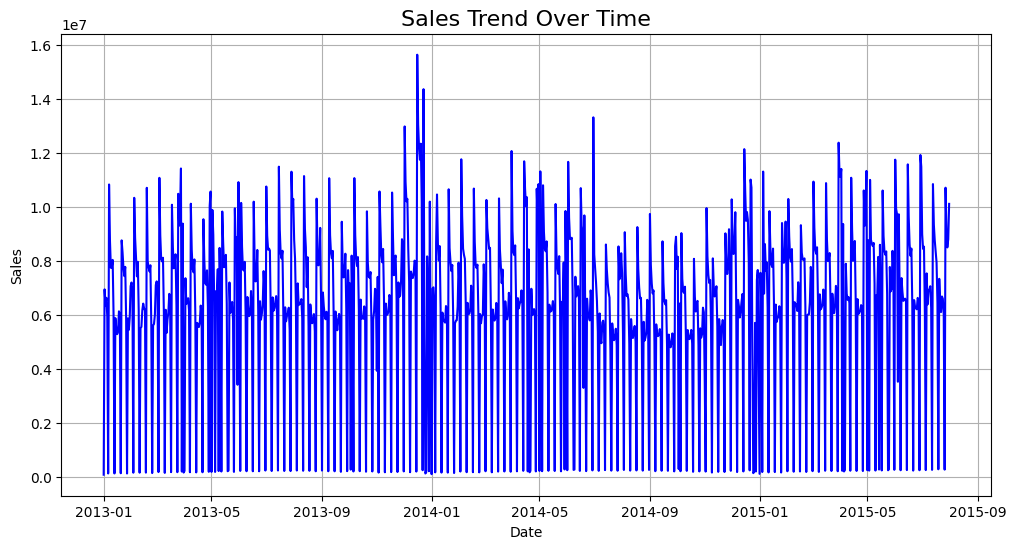

In [39]:
#Step 7 : EDA 
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Sales'], color='blue')
plt.title("Sales Trend Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


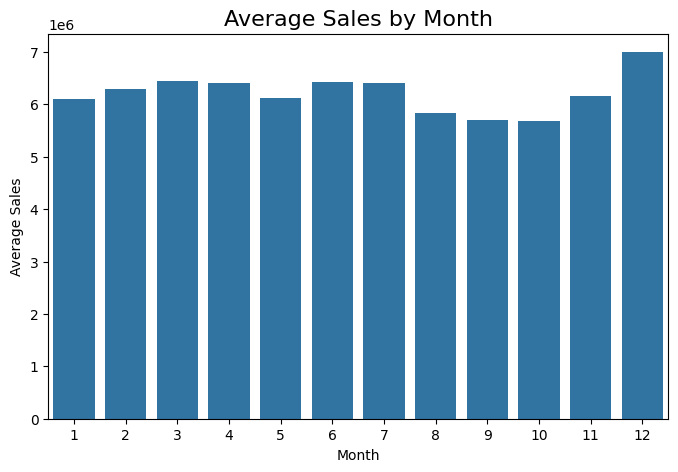

In [40]:
# Seasonal sales pattern (monthly average)
monthly_avg = daily_sales.groupby('month')['Sales'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values)
plt.title("Average Sales by Month", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.show()

In [45]:
# Step 8 : Prophet Model 
#in this We Can Rename # Prophet requires columns named 'ds' and 'y'
prophet_df = daily_sales[['Date', 'Sales']].rename(columns={'Date':'ds', 'Sales':'y'})
# Initialize Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.fit(prophet_df)
# Forecast for the next 90 days (3 months)
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)



11:13:26 - cmdstanpy - INFO - Chain [1] start processing
11:13:27 - cmdstanpy - INFO - Chain [1] done processing


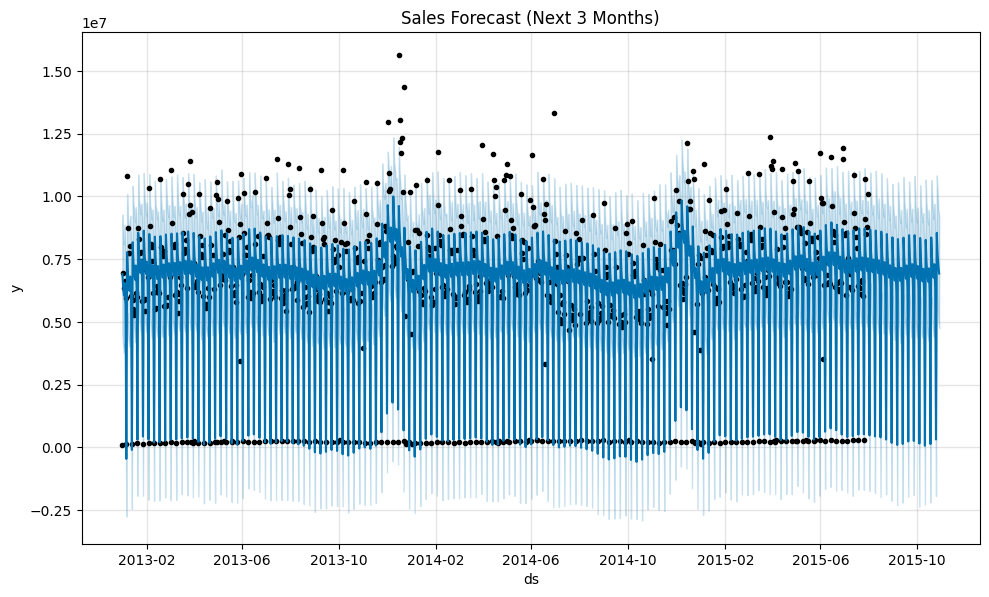

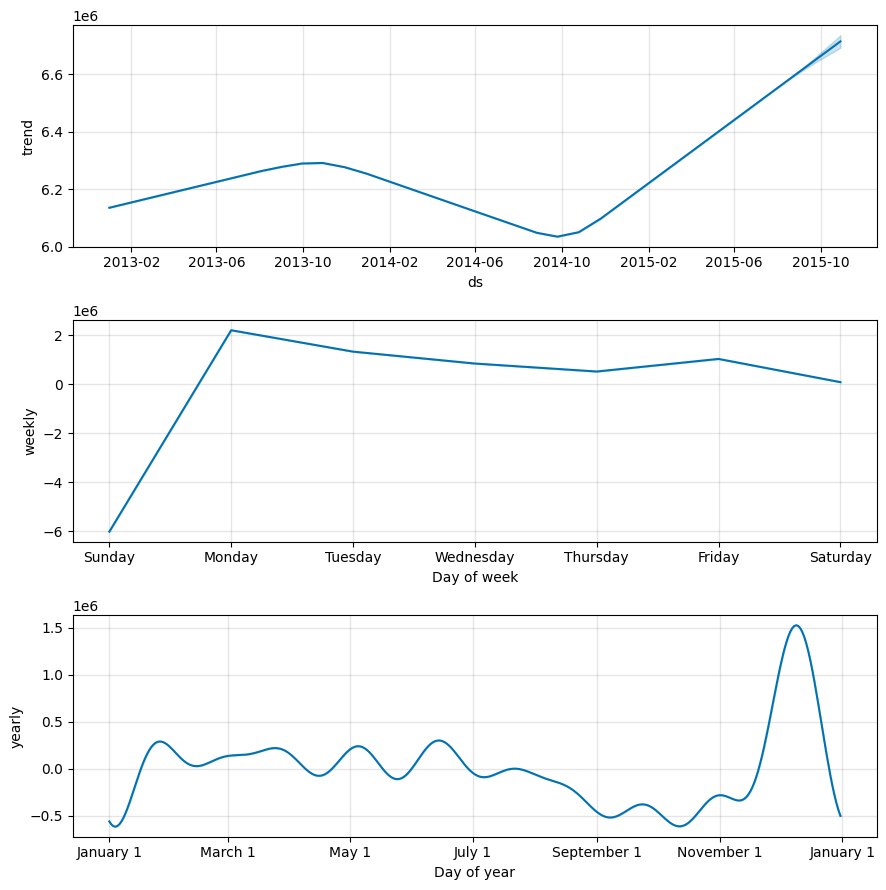

In [47]:
# Step 9 : PLot ForeCast 

model.plot(forecast)
plt.title("Sales Forecast (Next 3 Months)")
plt.show()
model.plot_components(forecast)
plt.show()


In [49]:
# Step 10 : Export Forecast 
forecast_output = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_output.rename(columns={
    'ds':'Date',
    'yhat':'predicted_sales',
    'yhat_lower':'lower_bound',
    'yhat_upper':'upper_bound'
}, inplace=True)
# Save to CSV for Power BI
forecast_output.to_csv("sales_forecast.csv", index=False)
print(" Forecast saved to 'sales_forecast.csv' for Power BI.")


 Forecast saved to 'sales_forecast.csv' for Power BI.


C:\Users\varik\AppData\Local\Temp\ipykernel_15624\2209676640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_output.rename(columns={


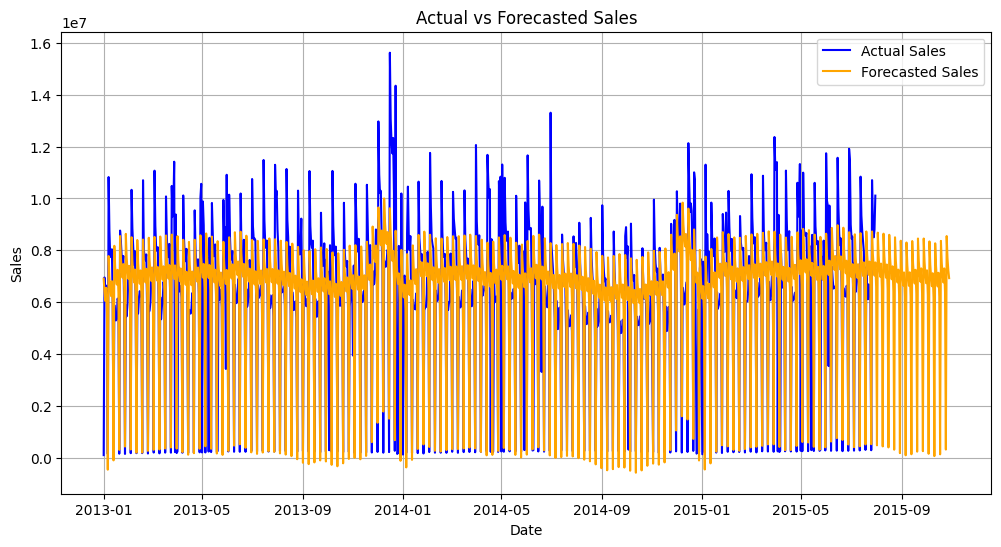

 We Done Notebook Execution Complete!


In [53]:
# Step 11 : Compare Actual vs Forecast
merged = pd.merge(daily_sales, forecast_output, on='Date', how='outer')

plt.figure(figsize=(12, 6))
plt.plot(merged['Date'], merged['Sales'], label='Actual Sales', color='blue')
plt.plot(merged['Date'], merged['predicted_sales'], label='Forecasted Sales', color='orange')
plt.title("Actual vs Forecasted Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()
print(" We Done Notebook Execution Complete!")

In [55]:
forecast_output.to_csv("sales_forecast.csv", index=False)



In [56]:
import os

In [57]:
os.getcwd()


'C:\\Users\\varik'

In [58]:
os.listdir()

['#input procesing.py',
 '.ai-navigator',
 '.anaconda',
 '.angular-config.json',
 '.bash_history',
 '.cache',
 '.conda',
 '.condarc',
 '.config',
 '.continuum',
 '.docker',
 '.eclipse',
 '.git',
 '.gitconfig',
 '.gradle',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.keras',
 '.lesshst',
 '.matplotlib',
 '.ms-ad',
 '.node_repl_history',
 '.npmrc',
 '.p2',
 '.rest-client',
 '.spyder-py3',
 '.ssh',
 '.streamlit',
 '.venv',
 '.viminfo',
 '.virtual_documents',
 '.vscode',
 '.vscode-R',
 '.wslconfig',
 '2.12',
 '22HT1A6159',
 'add.txt',
 'Amazing spiral.py',
 'AppData',
 'Application Data',
 'archive (3)',
 'aws-jenkins-setup.md',
 'c and d.ipynb',
 'cat_dog_model.h5',
 'cd',
 'CDLA-Permissive-2.0.pdf',
 'christmas tree.py',
 'circle spirograph.py',
 'cnnclassification dl.ipynb',
 'conditional.py',
 'Contacts',
 'Cookies',
 'Creative Cloud Files Personal Account varikutikoti98@gmail.com 1399295563CA895A0A495FF8@AdobeID',
 'data',
 'data.csv',
 'dataload.csv',
 'dataset',
 

In [59]:
forecast_output.to_csv("D:\\Data Sets\\storesale\\sales_forecast.csv", index=False)


In [60]:
# Load and check top rows
pd.read_csv("D:\\Data Sets\\storesale\\sales_forecast.csv").head()


,Date,predicted_sales,lower_bound,upper_bound
0,2013-01-01,6.902758e+06,4.545347e+06,9.283485e+06
1,2013-01-02,6.385881e+06,4.050474e+06,8.522570e+06
2,2013-01-03,6.042832e+06,3.769994e+06,8.093485e+06
3,2013-01-04,6.551061e+06,4.156337e+06,8.873073e+06
4,2013-01-05,5.612161e+06,3.331210e+06,7.683612e+06
